Hanh Tran

DSC 680 

Project 2  - Using Tensorflow

This is a dataset obtained from the StatLib repository. Below is the provided description:

S&P Letters Data
We collected information on the variables using all the block groups in California from the 1990 Cens us. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area. Naturally, the geographical area included varies inversely with the population density. We computed distances among the centroids of each block group as measured in latitude and longitude. We excluded all the block groups reporting zero entries for the independent and dependent variables. The final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value).

                        Bols    tols
INTERCEPT		       11.4939 275.7518

MEDIAN INCOME	       0.4790  45.7768

MEDIAN INCOME2	       -0.0166 -9.4841

MEDIAN INCOME3	       -0.0002 -1.9157

ln(MEDIAN AGE)	       0.1570  33.6123

ln(TOTAL ROOMS/ POPULATION)    -0.8582 -56.1280

ln(BEDROOMS/ POPULATION)       0.8043  38.0685

ln(POPULATION/ HOUSEHOLDS)     -0.4077 -20.8762

ln(HOUSEHOLDS)	       0.0477  13.0792

The file contains all the the variables. Specifically, it contains median house value, med ian income, housing median age, total rooms, total bedrooms, population, households, latitude, and lo ngitude in that order.
Reference
Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297.

The manuscript describing the data can be found at www.spatial-statistics.com. The data are also available as Matlab files.

Contact kelley@spatial-statistics.com or kelley@pace.am if you have any further questions. Thanks.

Source: StatLib repository.
Characteristics: 20460 cases, 8 attributes (0 nominal, 8 continuous).
Download : cal_housing.tgz (441963 bytes)

https://www.dcc.fc.up.pt/~ltorgo/Regression/DataSets.html

In [32]:
#import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [104]:
#import dataset
housing = pd.read_csv('ca_house_clean.csv')

In [105]:
housing.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


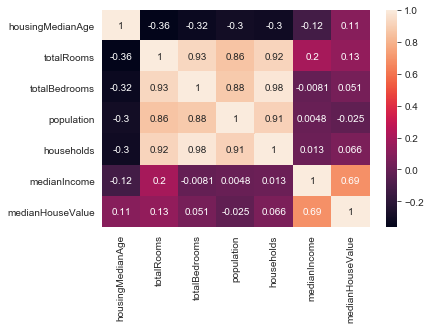

In [106]:
#create correlation heatmap of variables
sns.heatmap(housing.corr(), annot = True)

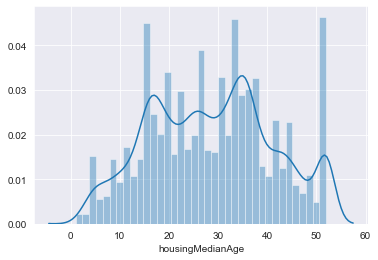

In [36]:
sns.set_style('darkgrid')
sns.distplot(housing['housingMedianAge'])

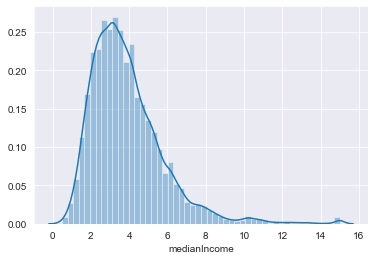

In [37]:
sns.set_style('darkgrid')
sns.distplot(housing['medianIncome'])

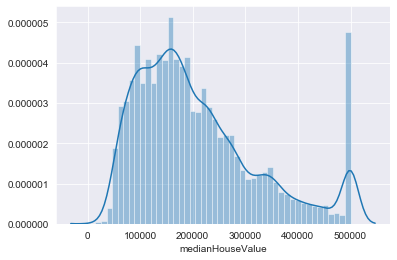

In [38]:
sns.set_style('darkgrid')
sns.distplot(housing['medianHouseValue'])

In [39]:
summarystat_df = housing.describe().transpose()

In [40]:
summarystat_df

,count,mean,std,min,25%,50%,75%,max
housingMedianAge,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
totalRooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
totalBedrooms,20640.0,537.898014,421.247906,1.0000,295.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
medianIncome,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
medianHouseValue,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [41]:
normalized = preprocessing.normalize(summarystat_df)

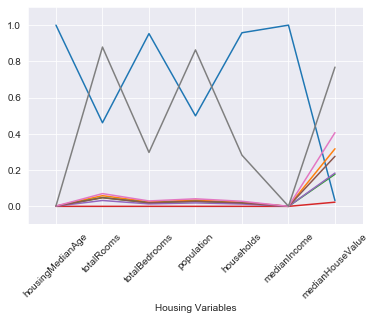

In [42]:
plt.plot(summarystat_df.index, normalized)
plt.xticks(summarystat_df.index, summarystat_df.index, rotation=45)
plt.margins(0.1)
plt.xlabel('Housing Variables')
plt.show()

In [107]:
x_data = housing.drop(['medianHouseValue'],axis=1)

In [108]:
y_val = housing['medianHouseValue']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_val,test_size=0.3)

In [110]:
scaler = MinMaxScaler()

In [111]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [112]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)

In [113]:
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [114]:
housing.columns

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome', 'medianHouseValue'],
      dtype='object')

In [115]:
age = tf.feature_column.numeric_column('housingMedianAge')
rooms = tf.feature_column.numeric_column('totalRooms')
bedrooms = tf.feature_column.numeric_column('totalBedrooms')
pop = tf.feature_column.numeric_column('population')
households = tf.feature_column.numeric_column('households')
income = tf.feature_column.numeric_column('medianIncome')

In [116]:
feat_cols = [ age,rooms,bedrooms,pop,households,income]

In [117]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=y_train ,batch_size=10,num_epochs=1000,
                                            shuffle=True)

In [118]:
model = tf.estimator.DNNRegressor(hidden_units=[30,30,30,30,30],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\hanhk\\AppData\\Local\\Temp\\tmp84p4tjul', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [119]:
model.train(input_fn=input_func,steps=200000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\hanhk\AppData\Local\Temp\tmp84p4tjul\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:lo

INFO:tensorflow:global_step/sec: 292.669
INFO:tensorflow:loss = 55141130000.0, step = 6600 (0.342 sec)
INFO:tensorflow:global_step/sec: 295.909
INFO:tensorflow:loss = 21678150000.0, step = 6700 (0.337 sec)
INFO:tensorflow:global_step/sec: 304.571
INFO:tensorflow:loss = 49390380000.0, step = 6800 (0.328 sec)
INFO:tensorflow:global_step/sec: 340.634
INFO:tensorflow:loss = 65060230000.0, step = 6900 (0.294 sec)
INFO:tensorflow:global_step/sec: 298.998
INFO:tensorflow:loss = 68578850000.0, step = 7000 (0.333 sec)
INFO:tensorflow:global_step/sec: 275.471
INFO:tensorflow:loss = 65197855000.0, step = 7100 (0.364 sec)
INFO:tensorflow:global_step/sec: 297.698
INFO:tensorflow:loss = 39306224000.0, step = 7200 (0.336 sec)
INFO:tensorflow:global_step/sec: 299.303
INFO:tensorflow:loss = 74073100000.0, step = 7300 (0.334 sec)
INFO:tensorflow:global_step/sec: 306.4
INFO:tensorflow:loss = 45009100000.0, step = 7400 (0.326 sec)
INFO:tensorflow:global_step/sec: 323.704
INFO:tensorflow:loss = 59888490000

INFO:tensorflow:loss = 21170043000.0, step = 14500 (0.330 sec)
INFO:tensorflow:global_step/sec: 299.634
INFO:tensorflow:loss = 49754560000.0, step = 14600 (0.333 sec)
INFO:tensorflow:global_step/sec: 292.795
INFO:tensorflow:loss = 24536056000.0, step = 14700 (0.342 sec)
INFO:tensorflow:global_step/sec: 311.447
INFO:tensorflow:loss = 23499570000.0, step = 14800 (0.322 sec)
INFO:tensorflow:global_step/sec: 301.383
INFO:tensorflow:loss = 26268676000.0, step = 14900 (0.332 sec)
INFO:tensorflow:global_step/sec: 299.086
INFO:tensorflow:loss = 31312360000.0, step = 15000 (0.334 sec)
INFO:tensorflow:global_step/sec: 289.339
INFO:tensorflow:loss = 29058783000.0, step = 15100 (0.347 sec)
INFO:tensorflow:global_step/sec: 259.087
INFO:tensorflow:loss = 15994774000.0, step = 15200 (0.386 sec)
INFO:tensorflow:global_step/sec: 246.967
INFO:tensorflow:loss = 38188257000.0, step = 15300 (0.404 sec)
INFO:tensorflow:global_step/sec: 284.033
INFO:tensorflow:loss = 36266910000.0, step = 15400 (0.352 sec)
I

INFO:tensorflow:global_step/sec: 308.086
INFO:tensorflow:loss = 7762197500.0, step = 22500 (0.325 sec)
INFO:tensorflow:global_step/sec: 301.026
INFO:tensorflow:loss = 2229400000.0, step = 22600 (0.331 sec)
INFO:tensorflow:global_step/sec: 307.353
INFO:tensorflow:loss = 14865280000.0, step = 22700 (0.326 sec)
INFO:tensorflow:global_step/sec: 306.953
INFO:tensorflow:loss = 7832707000.0, step = 22800 (0.326 sec)
INFO:tensorflow:global_step/sec: 302.252
INFO:tensorflow:loss = 14012339000.0, step = 22900 (0.331 sec)
INFO:tensorflow:global_step/sec: 304.23
INFO:tensorflow:loss = 6984160000.0, step = 23000 (0.328 sec)
INFO:tensorflow:global_step/sec: 298.956
INFO:tensorflow:loss = 7008037400.0, step = 23100 (0.336 sec)
INFO:tensorflow:global_step/sec: 299.422
INFO:tensorflow:loss = 19980276000.0, step = 23200 (0.333 sec)
INFO:tensorflow:global_step/sec: 313.938
INFO:tensorflow:loss = 11664655000.0, step = 23300 (0.319 sec)
INFO:tensorflow:global_step/sec: 286.872
INFO:tensorflow:loss = 118946

INFO:tensorflow:loss = 5111396000.0, step = 30400 (0.329 sec)
INFO:tensorflow:global_step/sec: 305.684
INFO:tensorflow:loss = 18656825000.0, step = 30500 (0.327 sec)
INFO:tensorflow:global_step/sec: 302.907
INFO:tensorflow:loss = 8026003000.0, step = 30600 (0.329 sec)
INFO:tensorflow:global_step/sec: 303.485
INFO:tensorflow:loss = 5680543000.0, step = 30700 (0.506 sec)
INFO:tensorflow:global_step/sec: 172.315
INFO:tensorflow:loss = 4094543400.0, step = 30800 (0.405 sec)
INFO:tensorflow:global_step/sec: 289.791
INFO:tensorflow:loss = 8059387000.0, step = 30900 (0.345 sec)
INFO:tensorflow:global_step/sec: 315.277
INFO:tensorflow:loss = 10743406000.0, step = 31000 (0.317 sec)
INFO:tensorflow:global_step/sec: 291.503
INFO:tensorflow:loss = 18775802000.0, step = 31100 (0.344 sec)
INFO:tensorflow:global_step/sec: 301.016
INFO:tensorflow:loss = 8084997600.0, step = 31200 (0.331 sec)
INFO:tensorflow:global_step/sec: 304.648
INFO:tensorflow:loss = 12829665000.0, step = 31300 (0.327 sec)
INFO:te

INFO:tensorflow:global_step/sec: 298.85
INFO:tensorflow:loss = 4344676400.0, step = 38400 (0.335 sec)
INFO:tensorflow:global_step/sec: 301.281
INFO:tensorflow:loss = 20558580000.0, step = 38500 (0.333 sec)
INFO:tensorflow:global_step/sec: 307.542
INFO:tensorflow:loss = 4074610000.0, step = 38600 (0.323 sec)
INFO:tensorflow:global_step/sec: 288.471
INFO:tensorflow:loss = 3567099100.0, step = 38700 (0.348 sec)
INFO:tensorflow:global_step/sec: 259.089
INFO:tensorflow:loss = 11533996000.0, step = 38800 (0.386 sec)
INFO:tensorflow:global_step/sec: 284.855
INFO:tensorflow:loss = 14204792000.0, step = 38900 (0.351 sec)
INFO:tensorflow:global_step/sec: 257.754
INFO:tensorflow:loss = 13214815000.0, step = 39000 (0.388 sec)
INFO:tensorflow:global_step/sec: 263.864
INFO:tensorflow:loss = 11253603000.0, step = 39100 (0.380 sec)
INFO:tensorflow:global_step/sec: 283.558
INFO:tensorflow:loss = 7250955300.0, step = 39200 (0.351 sec)
INFO:tensorflow:global_step/sec: 302.924
INFO:tensorflow:loss = 16730

INFO:tensorflow:global_step/sec: 296.828
INFO:tensorflow:loss = 14198598000.0, step = 46100 (0.337 sec)
INFO:tensorflow:global_step/sec: 301.129
INFO:tensorflow:loss = 10062943000.0, step = 46200 (0.332 sec)
INFO:tensorflow:global_step/sec: 305.129
INFO:tensorflow:loss = 8544518000.0, step = 46300 (0.328 sec)
INFO:tensorflow:global_step/sec: 293.197
INFO:tensorflow:loss = 18128163000.0, step = 46400 (0.341 sec)
INFO:tensorflow:global_step/sec: 307.856
INFO:tensorflow:loss = 6107673600.0, step = 46500 (0.325 sec)
INFO:tensorflow:global_step/sec: 302.779
INFO:tensorflow:loss = 8309099000.0, step = 46600 (0.330 sec)
INFO:tensorflow:global_step/sec: 285.653
INFO:tensorflow:loss = 8937271000.0, step = 46700 (0.349 sec)
INFO:tensorflow:global_step/sec: 339.898
INFO:tensorflow:loss = 3497039400.0, step = 46800 (0.295 sec)
INFO:tensorflow:global_step/sec: 308.364
INFO:tensorflow:loss = 3374931000.0, step = 46900 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.075
INFO:tensorflow:loss = 272728

INFO:tensorflow:loss = 4027202000.0, step = 54000 (0.330 sec)
INFO:tensorflow:global_step/sec: 299.918
INFO:tensorflow:loss = 6943006700.0, step = 54100 (0.332 sec)
INFO:tensorflow:global_step/sec: 309.83
INFO:tensorflow:loss = 11105678000.0, step = 54200 (0.324 sec)
INFO:tensorflow:global_step/sec: 302.274
INFO:tensorflow:loss = 8330068000.0, step = 54300 (0.331 sec)
INFO:tensorflow:global_step/sec: 309.857
INFO:tensorflow:loss = 11397668000.0, step = 54400 (0.322 sec)
INFO:tensorflow:global_step/sec: 302.285
INFO:tensorflow:loss = 7376148000.0, step = 54500 (0.331 sec)
INFO:tensorflow:global_step/sec: 298.609
INFO:tensorflow:loss = 21456026000.0, step = 54600 (0.335 sec)
INFO:tensorflow:global_step/sec: 305.844
INFO:tensorflow:loss = 14852786000.0, step = 54700 (0.327 sec)
INFO:tensorflow:global_step/sec: 303.749
INFO:tensorflow:loss = 12344386000.0, step = 54800 (0.329 sec)
INFO:tensorflow:global_step/sec: 287.261
INFO:tensorflow:loss = 17448718000.0, step = 54900 (0.347 sec)
INFO:t

INFO:tensorflow:global_step/sec: 320.205
INFO:tensorflow:loss = 25032999000.0, step = 62000 (0.312 sec)
INFO:tensorflow:global_step/sec: 302.428
INFO:tensorflow:loss = 10285362000.0, step = 62100 (0.331 sec)
INFO:tensorflow:global_step/sec: 288.181
INFO:tensorflow:loss = 15617198000.0, step = 62200 (0.347 sec)
INFO:tensorflow:global_step/sec: 288.919
INFO:tensorflow:loss = 15590225000.0, step = 62300 (0.346 sec)
INFO:tensorflow:global_step/sec: 302.035
INFO:tensorflow:loss = 5427135500.0, step = 62400 (0.331 sec)
INFO:tensorflow:global_step/sec: 278.496
INFO:tensorflow:loss = 19953848000.0, step = 62500 (0.359 sec)
INFO:tensorflow:global_step/sec: 271.752
INFO:tensorflow:loss = 20301814000.0, step = 62600 (0.368 sec)
INFO:tensorflow:global_step/sec: 259.762
INFO:tensorflow:loss = 7727101000.0, step = 62700 (0.385 sec)
INFO:tensorflow:global_step/sec: 287.298
INFO:tensorflow:loss = 7115335000.0, step = 62800 (0.353 sec)
INFO:tensorflow:global_step/sec: 259.09
INFO:tensorflow:loss = 1112

INFO:tensorflow:loss = 7551860700.0, step = 69900 (0.333 sec)
INFO:tensorflow:global_step/sec: 304.811
INFO:tensorflow:loss = 9016697000.0, step = 70000 (0.334 sec)
INFO:tensorflow:global_step/sec: 302.389
INFO:tensorflow:loss = 12934255000.0, step = 70100 (0.326 sec)
INFO:tensorflow:global_step/sec: 302.423
INFO:tensorflow:loss = 19491908000.0, step = 70200 (0.331 sec)
INFO:tensorflow:global_step/sec: 305.839
INFO:tensorflow:loss = 6598433000.0, step = 70300 (0.327 sec)
INFO:tensorflow:global_step/sec: 306.402
INFO:tensorflow:loss = 4465970000.0, step = 70400 (0.327 sec)
INFO:tensorflow:global_step/sec: 290.167
INFO:tensorflow:loss = 5928337400.0, step = 70500 (0.344 sec)
INFO:tensorflow:global_step/sec: 303.739
INFO:tensorflow:loss = 6419918300.0, step = 70600 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.736
INFO:tensorflow:loss = 5789406000.0, step = 70700 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.664
INFO:tensorflow:loss = 9989816000.0, step = 70800 (0.328 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 300.293
INFO:tensorflow:loss = 6906460700.0, step = 77900 (0.333 sec)
INFO:tensorflow:global_step/sec: 297.547
INFO:tensorflow:loss = 5787918000.0, step = 78000 (0.336 sec)
INFO:tensorflow:global_step/sec: 299.106
INFO:tensorflow:loss = 11028922000.0, step = 78100 (0.334 sec)
INFO:tensorflow:global_step/sec: 306.711
INFO:tensorflow:loss = 20488524000.0, step = 78200 (0.326 sec)
INFO:tensorflow:global_step/sec: 307.117
INFO:tensorflow:loss = 11337099000.0, step = 78300 (0.326 sec)
INFO:tensorflow:global_step/sec: 307.84
INFO:tensorflow:loss = 10403929000.0, step = 78400 (0.325 sec)
INFO:tensorflow:global_step/sec: 301.924
INFO:tensorflow:loss = 18299347000.0, step = 78500 (0.331 sec)
INFO:tensorflow:global_step/sec: 305.98
INFO:tensorflow:loss = 10126924000.0, step = 78600 (0.327 sec)
INFO:tensorflow:global_step/sec: 308.164
INFO:tensorflow:loss = 5445428700.0, step = 78700 (0.324 sec)
INFO:tensorflow:global_step/sec: 302.62
INFO:tensorflow:loss = 717326

INFO:tensorflow:loss = 7557752000.0, step = 85800 (0.362 sec)
INFO:tensorflow:global_step/sec: 268.095
INFO:tensorflow:loss = 13336846000.0, step = 85900 (0.373 sec)
INFO:tensorflow:global_step/sec: 272.466
INFO:tensorflow:loss = 5852630000.0, step = 86000 (0.367 sec)
INFO:tensorflow:global_step/sec: 290.63
INFO:tensorflow:loss = 6677783600.0, step = 86100 (0.343 sec)
INFO:tensorflow:global_step/sec: 295.945
INFO:tensorflow:loss = 17389296000.0, step = 86200 (0.339 sec)
INFO:tensorflow:global_step/sec: 300.888
INFO:tensorflow:loss = 11489982000.0, step = 86300 (0.332 sec)
INFO:tensorflow:global_step/sec: 315.581
INFO:tensorflow:loss = 6575031300.0, step = 86400 (0.317 sec)
INFO:tensorflow:global_step/sec: 304.666
INFO:tensorflow:loss = 13339446000.0, step = 86500 (0.328 sec)
INFO:tensorflow:global_step/sec: 303.381
INFO:tensorflow:loss = 7201325000.0, step = 86600 (0.330 sec)
INFO:tensorflow:global_step/sec: 297.308
INFO:tensorflow:loss = 33454615000.0, step = 86700 (0.336 sec)
INFO:te

INFO:tensorflow:global_step/sec: 270.263
INFO:tensorflow:loss = 4953382000.0, step = 93800 (0.371 sec)
INFO:tensorflow:global_step/sec: 268.812
INFO:tensorflow:loss = 16854223000.0, step = 93900 (0.375 sec)
INFO:tensorflow:global_step/sec: 242.194
INFO:tensorflow:loss = 4535961000.0, step = 94000 (0.419 sec)
INFO:tensorflow:global_step/sec: 212.431
INFO:tensorflow:loss = 6475017000.0, step = 94100 (0.466 sec)
INFO:tensorflow:global_step/sec: 268.813
INFO:tensorflow:loss = 8111093000.0, step = 94200 (0.367 sec)
INFO:tensorflow:global_step/sec: 251.297
INFO:tensorflow:loss = 9307403000.0, step = 94300 (0.398 sec)
INFO:tensorflow:global_step/sec: 288.956
INFO:tensorflow:loss = 8357496300.0, step = 94400 (0.345 sec)
INFO:tensorflow:global_step/sec: 274.702
INFO:tensorflow:loss = 6373551000.0, step = 94500 (0.364 sec)
INFO:tensorflow:global_step/sec: 266.886
INFO:tensorflow:loss = 18385682000.0, step = 94600 (0.375 sec)
INFO:tensorflow:global_step/sec: 302.399
INFO:tensorflow:loss = 2163004

INFO:tensorflow:loss = 12553136000.0, step = 101700 (0.334 sec)
INFO:tensorflow:global_step/sec: 305.308
INFO:tensorflow:loss = 11375145000.0, step = 101800 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.661
INFO:tensorflow:loss = 10450294000.0, step = 101900 (0.328 sec)
INFO:tensorflow:global_step/sec: 305.512
INFO:tensorflow:loss = 17433737000.0, step = 102000 (0.326 sec)
INFO:tensorflow:global_step/sec: 306.317
INFO:tensorflow:loss = 12753194000.0, step = 102100 (0.328 sec)
INFO:tensorflow:global_step/sec: 301.201
INFO:tensorflow:loss = 4395893000.0, step = 102200 (0.332 sec)
INFO:tensorflow:global_step/sec: 285.312
INFO:tensorflow:loss = 5440051000.0, step = 102300 (0.350 sec)
INFO:tensorflow:global_step/sec: 307.162
INFO:tensorflow:loss = 12363962000.0, step = 102400 (0.326 sec)
INFO:tensorflow:global_step/sec: 305.011
INFO:tensorflow:loss = 10493567000.0, step = 102500 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.895
INFO:tensorflow:loss = 12751945000.0, step = 102600 (0.32

INFO:tensorflow:global_step/sec: 290.606
INFO:tensorflow:loss = 6885020700.0, step = 109600 (0.344 sec)
INFO:tensorflow:global_step/sec: 304.196
INFO:tensorflow:loss = 14676421000.0, step = 109700 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.052
INFO:tensorflow:loss = 6577289700.0, step = 109800 (0.326 sec)
INFO:tensorflow:global_step/sec: 296.091
INFO:tensorflow:loss = 5807224000.0, step = 109900 (0.337 sec)
INFO:tensorflow:global_step/sec: 304.227
INFO:tensorflow:loss = 14399177000.0, step = 110000 (0.328 sec)
INFO:tensorflow:global_step/sec: 305.382
INFO:tensorflow:loss = 3018487300.0, step = 110100 (0.328 sec)
INFO:tensorflow:global_step/sec: 309.02
INFO:tensorflow:loss = 6762592000.0, step = 110200 (0.326 sec)
INFO:tensorflow:global_step/sec: 309.5
INFO:tensorflow:loss = 8243473400.0, step = 110300 (0.321 sec)
INFO:tensorflow:global_step/sec: 296.125
INFO:tensorflow:loss = 9392415000.0, step = 110400 (0.337 sec)
INFO:tensorflow:global_step/sec: 301.599
INFO:tensorflow:loss = 4

INFO:tensorflow:global_step/sec: 299.77
INFO:tensorflow:loss = 7991180300.0, step = 117500 (0.334 sec)
INFO:tensorflow:global_step/sec: 299.605
INFO:tensorflow:loss = 14922220000.0, step = 117600 (0.333 sec)
INFO:tensorflow:global_step/sec: 310.603
INFO:tensorflow:loss = 3880910800.0, step = 117700 (0.322 sec)
INFO:tensorflow:global_step/sec: 305.518
INFO:tensorflow:loss = 11965555000.0, step = 117800 (0.327 sec)
INFO:tensorflow:global_step/sec: 285.629
INFO:tensorflow:loss = 4556794400.0, step = 117900 (0.362 sec)
INFO:tensorflow:global_step/sec: 302.119
INFO:tensorflow:loss = 15507112000.0, step = 118000 (0.320 sec)
INFO:tensorflow:global_step/sec: 347.486
INFO:tensorflow:loss = 16432669000.0, step = 118100 (0.290 sec)
INFO:tensorflow:global_step/sec: 286.738
INFO:tensorflow:loss = 16588626000.0, step = 118200 (0.348 sec)
INFO:tensorflow:global_step/sec: 270.99
INFO:tensorflow:loss = 7193302000.0, step = 118300 (0.368 sec)
INFO:tensorflow:global_step/sec: 265.964
INFO:tensorflow:loss

INFO:tensorflow:global_step/sec: 302.833
INFO:tensorflow:loss = 12245615000.0, step = 125400 (0.331 sec)
INFO:tensorflow:global_step/sec: 309.829
INFO:tensorflow:loss = 4759747600.0, step = 125500 (0.322 sec)
INFO:tensorflow:global_step/sec: 300.185
INFO:tensorflow:loss = 6043262000.0, step = 125600 (0.333 sec)
INFO:tensorflow:global_step/sec: 304.275
INFO:tensorflow:loss = 6253191000.0, step = 125700 (0.328 sec)
INFO:tensorflow:global_step/sec: 305.574
INFO:tensorflow:loss = 10351692000.0, step = 125800 (0.328 sec)
INFO:tensorflow:global_step/sec: 294.796
INFO:tensorflow:loss = 20474250000.0, step = 125900 (0.339 sec)
INFO:tensorflow:global_step/sec: 306.791
INFO:tensorflow:loss = 6500732000.0, step = 126000 (0.326 sec)
INFO:tensorflow:global_step/sec: 294.632
INFO:tensorflow:loss = 13221580000.0, step = 126100 (0.340 sec)
INFO:tensorflow:global_step/sec: 296.867
INFO:tensorflow:loss = 6309275000.0, step = 126200 (0.336 sec)
INFO:tensorflow:global_step/sec: 304.886
INFO:tensorflow:los

INFO:tensorflow:global_step/sec: 274.705
INFO:tensorflow:loss = 4718385000.0, step = 133300 (0.362 sec)
INFO:tensorflow:global_step/sec: 248.188
INFO:tensorflow:loss = 6978661000.0, step = 133400 (0.401 sec)
INFO:tensorflow:global_step/sec: 223.811
INFO:tensorflow:loss = 4946379000.0, step = 133500 (0.448 sec)
INFO:tensorflow:global_step/sec: 265.962
INFO:tensorflow:loss = 7143365000.0, step = 133600 (0.377 sec)
INFO:tensorflow:global_step/sec: 261.796
INFO:tensorflow:loss = 6428507000.0, step = 133700 (0.380 sec)
INFO:tensorflow:global_step/sec: 204.211
INFO:tensorflow:loss = 14413486000.0, step = 133800 (0.490 sec)
INFO:tensorflow:global_step/sec: 277.746
INFO:tensorflow:loss = 8070898700.0, step = 133900 (0.359 sec)
INFO:tensorflow:global_step/sec: 251.299
INFO:tensorflow:loss = 7131175400.0, step = 134000 (0.400 sec)
INFO:tensorflow:global_step/sec: 276.219
INFO:tensorflow:loss = 5268759000.0, step = 134100 (0.361 sec)
INFO:tensorflow:global_step/sec: 280.076
INFO:tensorflow:loss =

INFO:tensorflow:global_step/sec: 293.023
INFO:tensorflow:loss = 13399451000.0, step = 141200 (0.341 sec)
INFO:tensorflow:global_step/sec: 302.453
INFO:tensorflow:loss = 6921603600.0, step = 141300 (0.330 sec)
INFO:tensorflow:global_step/sec: 308.945
INFO:tensorflow:loss = 12506030000.0, step = 141400 (0.325 sec)
INFO:tensorflow:global_step/sec: 300.621
INFO:tensorflow:loss = 6929711000.0, step = 141500 (0.333 sec)
INFO:tensorflow:global_step/sec: 309.155
INFO:tensorflow:loss = 3386497300.0, step = 141600 (0.324 sec)
INFO:tensorflow:global_step/sec: 300.818
INFO:tensorflow:loss = 15917807000.0, step = 141700 (0.332 sec)
INFO:tensorflow:global_step/sec: 304.292
INFO:tensorflow:loss = 17282402000.0, step = 141800 (0.329 sec)
INFO:tensorflow:global_step/sec: 299.164
INFO:tensorflow:loss = 7246830000.0, step = 141900 (0.333 sec)
INFO:tensorflow:global_step/sec: 301.428
INFO:tensorflow:loss = 16939874000.0, step = 142000 (0.333 sec)
INFO:tensorflow:global_step/sec: 300.799
INFO:tensorflow:lo

INFO:tensorflow:global_step/sec: 303.842
INFO:tensorflow:loss = 14160118000.0, step = 149100 (0.328 sec)
INFO:tensorflow:global_step/sec: 326.606
INFO:tensorflow:loss = 7596019700.0, step = 149200 (0.307 sec)
INFO:tensorflow:global_step/sec: 266.117
INFO:tensorflow:loss = 7390866000.0, step = 149300 (0.375 sec)
INFO:tensorflow:global_step/sec: 288.006
INFO:tensorflow:loss = 9391983000.0, step = 149400 (0.349 sec)
INFO:tensorflow:global_step/sec: 278.525
INFO:tensorflow:loss = 6235226600.0, step = 149500 (0.358 sec)
INFO:tensorflow:global_step/sec: 273.955
INFO:tensorflow:loss = 8773400000.0, step = 149600 (0.365 sec)
INFO:tensorflow:global_step/sec: 270.261
INFO:tensorflow:loss = 10327583000.0, step = 149700 (0.370 sec)
INFO:tensorflow:global_step/sec: 284.85
INFO:tensorflow:loss = 9907771000.0, step = 149800 (0.352 sec)
INFO:tensorflow:global_step/sec: 277.415
INFO:tensorflow:loss = 13091404000.0, step = 149900 (0.360 sec)
INFO:tensorflow:global_step/sec: 298.496
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 290.65
INFO:tensorflow:loss = 7028889000.0, step = 157000 (0.343 sec)
INFO:tensorflow:global_step/sec: 301.909
INFO:tensorflow:loss = 8308262400.0, step = 157100 (0.332 sec)
INFO:tensorflow:global_step/sec: 293.136
INFO:tensorflow:loss = 16000022000.0, step = 157200 (0.341 sec)
INFO:tensorflow:global_step/sec: 307.611
INFO:tensorflow:loss = 11836797000.0, step = 157300 (0.325 sec)
INFO:tensorflow:global_step/sec: 303.1
INFO:tensorflow:loss = 11925094000.0, step = 157400 (0.330 sec)
INFO:tensorflow:global_step/sec: 298.377
INFO:tensorflow:loss = 6055617500.0, step = 157500 (0.335 sec)
INFO:tensorflow:global_step/sec: 303.564
INFO:tensorflow:loss = 9379665000.0, step = 157600 (0.330 sec)
INFO:tensorflow:global_step/sec: 297.759
INFO:tensorflow:loss = 23556960000.0, step = 157700 (0.336 sec)
INFO:tensorflow:global_step/sec: 305.233
INFO:tensorflow:loss = 21859594000.0, step = 157800 (0.327 sec)
INFO:tensorflow:global_step/sec: 308.599
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 296.921
INFO:tensorflow:loss = 8321119000.0, step = 164900 (0.337 sec)
INFO:tensorflow:global_step/sec: 304.692
INFO:tensorflow:loss = 7694224400.0, step = 165000 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.634
INFO:tensorflow:loss = 9274442000.0, step = 165100 (0.329 sec)
INFO:tensorflow:global_step/sec: 299.23
INFO:tensorflow:loss = 11021124000.0, step = 165200 (0.334 sec)
INFO:tensorflow:global_step/sec: 301.804
INFO:tensorflow:loss = 9272097000.0, step = 165300 (0.331 sec)
INFO:tensorflow:global_step/sec: 303.37
INFO:tensorflow:loss = 12274646000.0, step = 165400 (0.330 sec)
INFO:tensorflow:global_step/sec: 306.33
INFO:tensorflow:loss = 18407518000.0, step = 165500 (0.326 sec)
INFO:tensorflow:global_step/sec: 302.214
INFO:tensorflow:loss = 5074879500.0, step = 165600 (0.330 sec)
INFO:tensorflow:global_step/sec: 281.395
INFO:tensorflow:loss = 9698060000.0, step = 165700 (0.356 sec)
INFO:tensorflow:global_step/sec: 303.011
INFO:tensorflow:loss = 

INFO:tensorflow:global_step/sec: 301.519
INFO:tensorflow:loss = 6567503400.0, step = 172800 (0.332 sec)
INFO:tensorflow:global_step/sec: 297.722
INFO:tensorflow:loss = 3267903000.0, step = 172900 (0.336 sec)
INFO:tensorflow:global_step/sec: 300.571
INFO:tensorflow:loss = 3445305300.0, step = 173000 (0.333 sec)
INFO:tensorflow:global_step/sec: 297.528
INFO:tensorflow:loss = 16824420000.0, step = 173100 (0.336 sec)
INFO:tensorflow:global_step/sec: 286.48
INFO:tensorflow:loss = 11246648000.0, step = 173200 (0.349 sec)
INFO:tensorflow:global_step/sec: 269.536
INFO:tensorflow:loss = 8818895000.0, step = 173300 (0.370 sec)
INFO:tensorflow:global_step/sec: 266.671
INFO:tensorflow:loss = 2855032300.0, step = 173400 (0.376 sec)
INFO:tensorflow:global_step/sec: 284.851
INFO:tensorflow:loss = 7559265000.0, step = 173500 (0.351 sec)
INFO:tensorflow:global_step/sec: 307.348
INFO:tensorflow:loss = 9842319000.0, step = 173600 (0.347 sec)
INFO:tensorflow:global_step/sec: 273.968
INFO:tensorflow:loss =

INFO:tensorflow:global_step/sec: 306.477
INFO:tensorflow:loss = 9097107000.0, step = 180400 (0.326 sec)
INFO:tensorflow:global_step/sec: 292.287
INFO:tensorflow:loss = 9595857000.0, step = 180500 (0.343 sec)
INFO:tensorflow:global_step/sec: 265.333
INFO:tensorflow:loss = 9992072000.0, step = 180600 (0.375 sec)
INFO:tensorflow:global_step/sec: 302.005
INFO:tensorflow:loss = 5764260400.0, step = 180700 (0.333 sec)
INFO:tensorflow:global_step/sec: 304.679
INFO:tensorflow:loss = 9960192000.0, step = 180800 (0.328 sec)
INFO:tensorflow:global_step/sec: 293.602
INFO:tensorflow:loss = 9782958000.0, step = 180900 (0.341 sec)
INFO:tensorflow:global_step/sec: 309.579
INFO:tensorflow:loss = 7461556000.0, step = 181000 (0.323 sec)
INFO:tensorflow:global_step/sec: 294.464
INFO:tensorflow:loss = 9959206000.0, step = 181100 (0.339 sec)
INFO:tensorflow:global_step/sec: 300.479
INFO:tensorflow:loss = 2316408300.0, step = 181200 (0.333 sec)
INFO:tensorflow:global_step/sec: 301.865
INFO:tensorflow:loss = 

INFO:tensorflow:global_step/sec: 281.062
INFO:tensorflow:loss = 7781143600.0, step = 188300 (0.356 sec)
INFO:tensorflow:global_step/sec: 301.881
INFO:tensorflow:loss = 11708593000.0, step = 188400 (0.331 sec)
INFO:tensorflow:global_step/sec: 306.773
INFO:tensorflow:loss = 12537717000.0, step = 188500 (0.326 sec)
INFO:tensorflow:global_step/sec: 290.722
INFO:tensorflow:loss = 11527086000.0, step = 188600 (0.344 sec)
INFO:tensorflow:global_step/sec: 294.642
INFO:tensorflow:loss = 5174961000.0, step = 188700 (0.340 sec)
INFO:tensorflow:global_step/sec: 307.302
INFO:tensorflow:loss = 12379411000.0, step = 188800 (0.324 sec)
INFO:tensorflow:global_step/sec: 303.883
INFO:tensorflow:loss = 15981230000.0, step = 188900 (0.330 sec)
INFO:tensorflow:global_step/sec: 301.788
INFO:tensorflow:loss = 7489209300.0, step = 189000 (0.331 sec)
INFO:tensorflow:global_step/sec: 305.165
INFO:tensorflow:loss = 10558594000.0, step = 189100 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.493
INFO:tensorflow:l

INFO:tensorflow:global_step/sec: 295.856
INFO:tensorflow:loss = 9347284000.0, step = 196200 (0.334 sec)
INFO:tensorflow:global_step/sec: 293.109
INFO:tensorflow:loss = 7497837600.0, step = 196300 (0.340 sec)
INFO:tensorflow:global_step/sec: 308.793
INFO:tensorflow:loss = 6759765000.0, step = 196400 (0.324 sec)
INFO:tensorflow:global_step/sec: 296.945
INFO:tensorflow:loss = 9492889000.0, step = 196500 (0.337 sec)
INFO:tensorflow:global_step/sec: 299.585
INFO:tensorflow:loss = 4888606700.0, step = 196600 (0.334 sec)
INFO:tensorflow:global_step/sec: 268.099
INFO:tensorflow:loss = 7706953000.0, step = 196700 (0.373 sec)
INFO:tensorflow:global_step/sec: 263.169
INFO:tensorflow:loss = 8553799700.0, step = 196800 (0.380 sec)
INFO:tensorflow:global_step/sec: 295.774
INFO:tensorflow:loss = 11379341000.0, step = 196900 (0.348 sec)
INFO:tensorflow:global_step/sec: 273.951
INFO:tensorflow:loss = 6961442000.0, step = 197000 (0.354 sec)
INFO:tensorflow:global_step/sec: 263.173
INFO:tensorflow:loss =

In [120]:
predict_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [121]:
pred_gen = model.predict(predict_input_func)

In [122]:
predictions = list(pred_gen)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\hanhk\AppData\Local\Temp\tmp84p4tjul\model.ckpt-200000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [123]:
predictions

[{'predictions': array([230374.73], dtype=float32)},
 {'predictions': array([267431.75], dtype=float32)},
 {'predictions': array([238961.36], dtype=float32)},
 {'predictions': array([272512.3], dtype=float32)},
 {'predictions': array([217102.66], dtype=float32)},
 {'predictions': array([222807.11], dtype=float32)},
 {'predictions': array([236331.05], dtype=float32)},
 {'predictions': array([157251.02], dtype=float32)},
 {'predictions': array([233528.92], dtype=float32)},
 {'predictions': array([215902.39], dtype=float32)},
 {'predictions': array([218132.69], dtype=float32)},
 {'predictions': array([199658.45], dtype=float32)},
 {'predictions': array([210003.47], dtype=float32)},
 {'predictions': array([226982.98], dtype=float32)},
 {'predictions': array([170872.44], dtype=float32)},
 {'predictions': array([224427.73], dtype=float32)},
 {'predictions': array([209543.02], dtype=float32)},
 {'predictions': array([299524.38], dtype=float32)},
 {'predictions': array([152935.48], dtype=float

In [124]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

In [125]:
mean_squared_error(y_test,final_preds)**0.5

100643.31862409147